Reading
6.3.4 Binary search -- a.k.a. the bisection method
6.3.5 Newton's method -- a.k.a. the Newton-Raphson method
Interactive Practice
Complete through Exercise TBD in Weekly Session 8
Example 6.3: Ferromagnetism

## 6.3.4 Binary Search (Bisection method)

The **Bisection method** works by finding the roots for a function f(x) over a specified interval. This method will always find a root on the given interval if it exists. If there is exactly one root on the interval that the end point values will be of opposite sign. We then take the x-point in between our two endpoints. If the function value here is 0 then bang, done, else it will be positive or negative. Can repeat this with the endpoint of opposite sign. Can continue to pick the midpoint between the two until we get arbitrarily close to the root value.

Given interval (x1, x2) and function f(x), then the procedure is

    1) check to see if f(x1) and f(x2) are of opposite signs
    2) calc midpoint x' and f(x')
    3) if f(x') has the same sign as f(x1) then set x1 = x', else x2 = x'
    4) while |x1 - x2| > target accuracy repeat from step (2), else find the midpoint one last time
    
Given $|x_1 - x_2| = \delta$ then after N steps $\delta/2^N$. So given the desired error C   
$N = \log_2 (\frac{\delta}{C})$  
is the number of steps required to achieve this accuracy.


This method does have disadvantages:

    1) if there does not exist a root (or root in given domain) then it will fail
    2) if there is an even number of roots within the given domain the it will fail
    2) it cannot find roots if the roots exist at the same place (eg (1 -  x)^2). 
        This is a more specific case of # 2
    4) you need to have a starting domain to look at
    5) it only works for a single equation in one variable, so cannot use it to solve 
        multiple simultaneous equations

## Newton's Method

Like the binary method we convert to finding root of function f(x). In this method we start with a guess and use the slope to determine another guess. This method require knowing the equation for f'(x).

Clearly it is the case that the slope at x is   
$f'(x) = \frac{f(x)}{\Delta x}$   
so our new point x' is given by  
$x' = x - \Delta x = x - \frac{f(x)}{f'(x)}$

If we let $x^*$ represent the actual answer and x represent our guess then using the tylor series expansion again we can find that   
$x^* \approx x' - \frac{1}{2} (x^* - x)^2 \frac{f''(x)}{f'(x)}$

Defining the error $\epsilon$ on our first estimate x of the root by $x^* = x + \epsilon$, and similiarly the error on the next estimate x' by $x* = x' + \epsilon'$ then   
$\epsilon' = \big [ \frac{-f''(x)}{2f'(x)} \big ] \epsilon^2$

This shows that the Newton's method converges quadratically, thus faster than the Binary and Relaxation method.

Assuming that $c = -f'''(x)/2f'(x)$ is roughly constant near the root then the error $\epsilon$ after N iterations is approximatly (given the error on the initial guess as $\epsilon_o$)   
$\epsilon \approx (x\epsilon_o)^{2^N}/c$

$x' - x \approx \epsilon$

So f $\epsilon$ is small enough our erro on the value x is the change from x' to x from one iteration to the next. This gives the error on the old estimate of x, not the current one.

The two main disadvantages are

    1) you need to know equation for f'(x) (but you could use approximation method for this)
    2) if f'(x) is very small then this method may not converge. inflection points that aren't roots also result in this problem

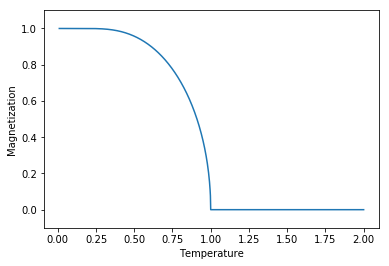

In [1]:
#example 6.3
%matplotlib inline

from math import tanh, cosh
from numpy import linspace
from pylab import plot, show, ylim, xlabel, ylabel

#Constants
Tmax =2.0
points = 1000
accuracy = 1e-6

#set up lists for plotting
y = []
temp = linspace (0.01, Tmax, points)

#Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0
    
    #loop until error is small enough
    while error > accuracy:
        m1, m2 = tanh (m1 / T), m1
        error = abs ((m1 - m2) / (1 - T * cosh (m1 / T)**2))
    y.append (m1)

# Make the graph
plot (temp, y)
ylim (-0.1, 1.1)
xlabel ("Temperature")
ylabel ("Magnetization")
show ()
